Titanic Survival Prediction

In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
# Step 1: Load Dataset
data = pd.read_csv('C:/Users/soniy/Downloads/archive (3)/tested.csv')  # Replace with your dataset's file path
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [12]:
# Display the first few rows
print("\nInitial Dataset Overview:")
print(data.head().T)


Initial Dataset Overview:
                            0                                 1  \
PassengerId               892                               893   
Survived                    0                                 1   
Pclass                      3                                 3   
Name         Kelly, Mr. James  Wilkes, Mrs. James (Ellen Needs)   
Sex                      male                            female   
Age                      34.5                              47.0   
SibSp                       0                                 1   
Parch                       0                                 0   
Ticket                 330911                            363272   
Fare                   7.8292                               7.0   
Cabin                     NaN                               NaN   
Embarked                    Q                                 S   

                                     2                 3  \
PassengerId                        894   

In [13]:
# Step 2: Exploratory Data Analysis (EDA)
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [14]:
# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())



Missing Values Summary:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


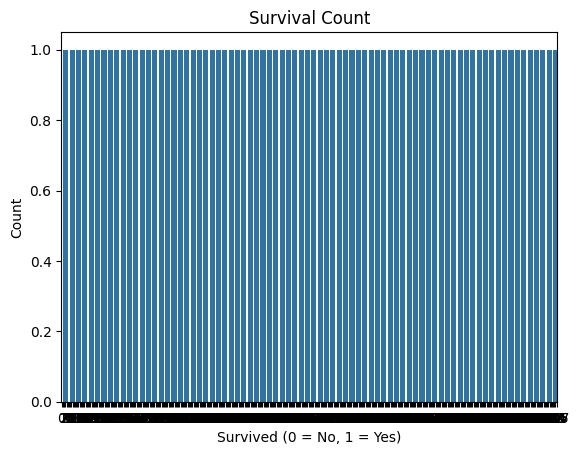

In [15]:
# Visualize the distribution of the target variable
sns.countplot(data['Survived'])
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

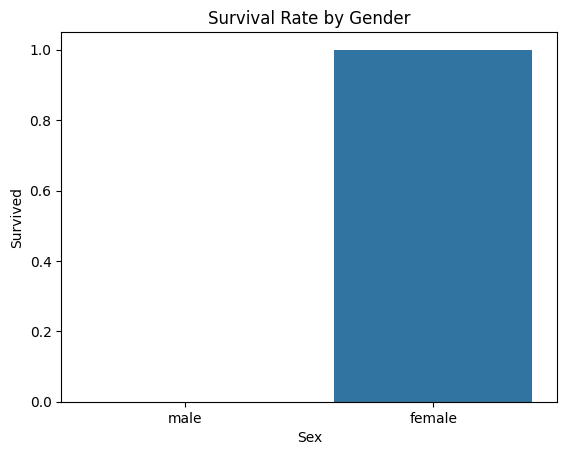

In [16]:
# Visualize survival rates by gender
sns.barplot(x="Sex", y="Survived", data=data)
plt.title("Survival Rate by Gender")
plt.show()

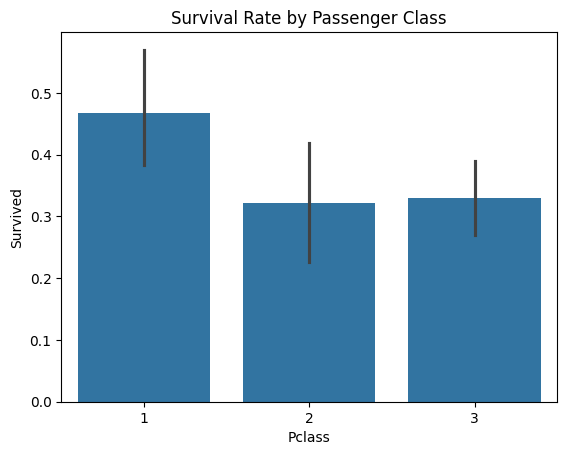

In [17]:
# Visualize survival rates by passenger class
sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [18]:
if 'Cabin' in data.columns:
    data = data.drop(columns=['Cabin'])


In [19]:
# Step 3: Data Cleaning
# Fill missing 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Drop 'Cabin' column if it exists
if 'Cabin' in data.columns:
    data = data.drop(columns=['Cabin'])

# Drop rows with missing 'Embarked'
if 'Embarked' in data.columns:
    data = data.dropna(subset=['Embarked'])

# Fill missing 'Fare' with the median
if 'Fare' in data.columns:
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())



In [20]:
# Step 4: Feature Engineering
# Convert categorical variables to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# One-hot encode the 'Pclass' variable
data = pd.get_dummies(data, columns=['Pclass'], drop_first=True)

# Drop unnecessary columns (PassengerId, Name, Ticket)
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

print("\nCleaned Dataset Overview:")
print(data.head())



Cleaned Dataset Overview:
   Survived  Sex   Age  SibSp  Parch     Fare  Embarked  Pclass_2  Pclass_3
0         0    0  34.5      0      0   7.8292         1     False      True
1         1    1  47.0      1      0   7.0000         2     False      True
2         0    0  62.0      0      0   9.6875         1      True     False
3         0    0  27.0      0      0   8.6625         2     False      True
4         1    1  22.0      1      1  12.2875         2     False      True


In [21]:
# Step 5: Feature Selection
features = data.drop(columns=['Survived'])
target = data['Survived']

In [22]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("\nTraining and Testing Sets Created!")
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training and Testing Sets Created!
Training Set Shape: (334, 8)
Testing Set Shape: (84, 8)


In [23]:
# Step 7: Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nModel Training Completed!")


Model Training Completed!


In [24]:
# Step 8: Model Evaluation
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


In [25]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



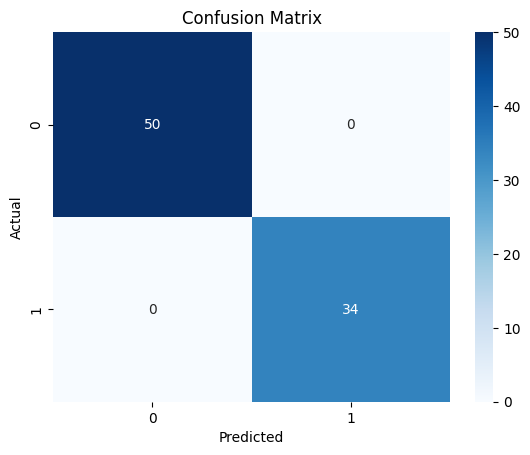

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\soniy\AppData\Local\Temp\ipykernel_7268\1725024797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


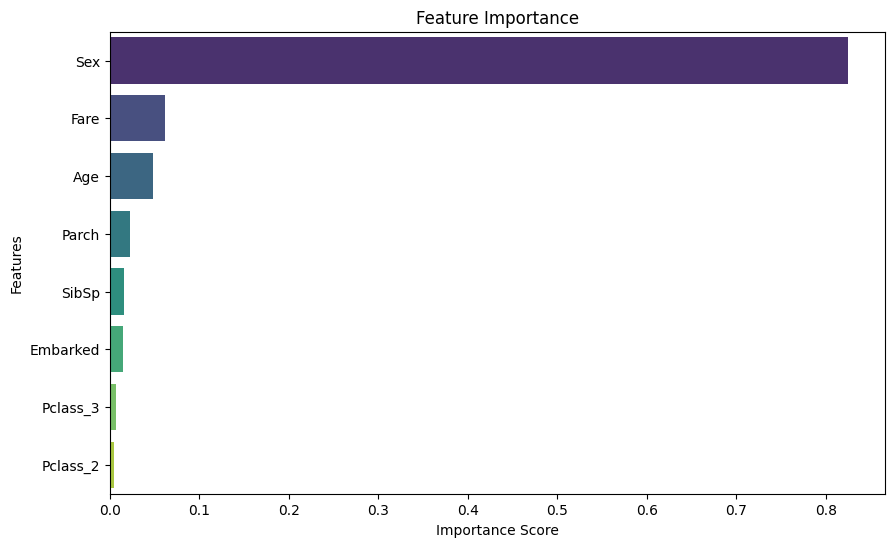

In [27]:
# Step 9: Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()